<a href="https://colab.research.google.com/github/YoungsunChoi914/2022-spring/blob/main/scikit_learn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Scikit-Learn for machine learning

### Understanding iris data

In [1]:
import seaborn as sns
df = sns.load_dataset('iris')

seaborn은 stat(통계) 관련해서 많이 사용
iris는 굉장히 유명한 데이터

In [2]:
type(df)

pandas.core.frame.DataFrame

In [3]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [4]:
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


iris: 붓꽃, 세가지 종류가 있음 (setosa, vrsicolor, virginica)/


In [6]:
df['species'].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

species에서 중복값 빼고 unique한 값들만 출력



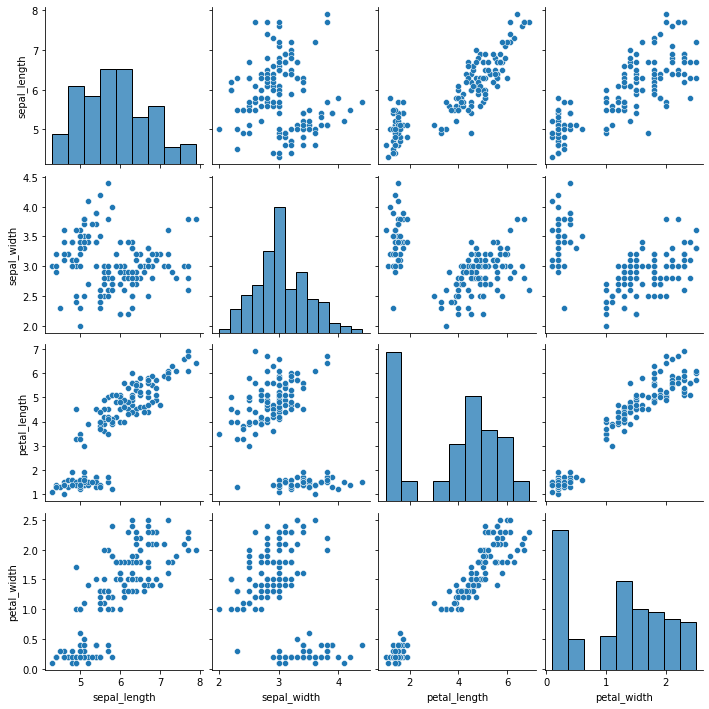

In [8]:
sns.pairplot(df)

pairplot: 쌍으로 plot을 만들어줌.

---

대각선상에 히스토그램으로 표시된 부분은 사실상 pair가 아니라 한 값의 중복이므로 비워두지 않고 그냥 히스토그램으로 표시한것

---
히스토그램들을 기준으로 위와 아래의 표들은 같은 자료들임 (대칭)


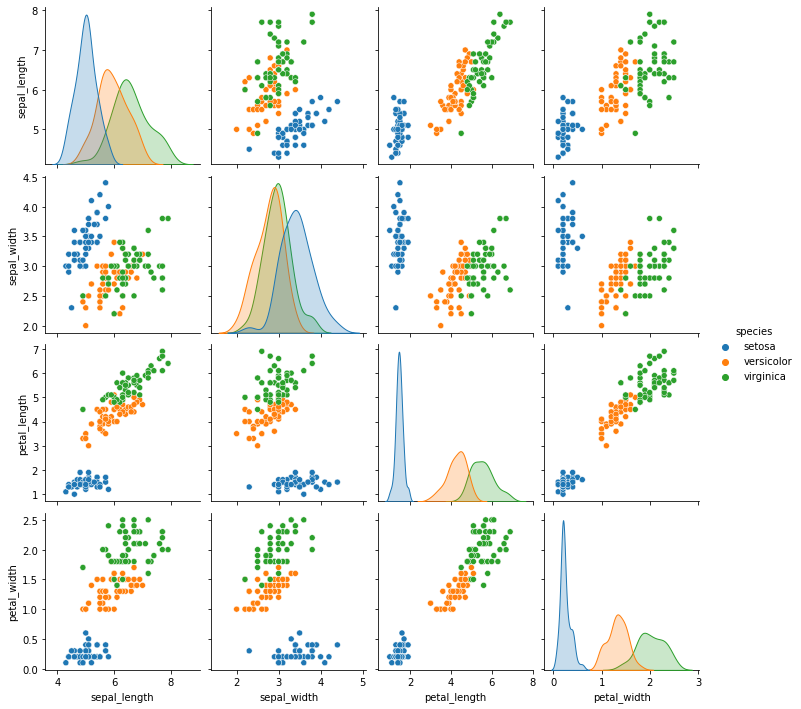

In [7]:
sns.pairplot(df, hue='species')

species 정보 사용하기. 종 별로 색깔을 다르게 하여 표시

---
hue='species': species 별로 색깔을 다르게 하라


Text(0, 0.5, 'sepal_width')

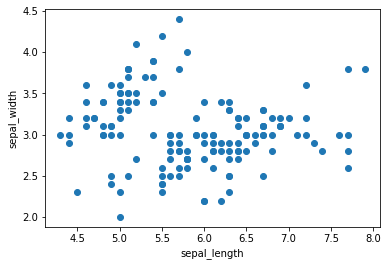

In [9]:
x = list(df['sepal_length'])
y = list(df['sepal_width'])

import matplotlib.pyplot as plt
plt.scatter(x, y);
plt.xlabel('sepal_length')
plt.ylabel('sepal_width')

x, y에 각각 150개의 수치가 들어가게 됨. list() 사용하여 dataframe을 list로 변환

---

plt.scatter(x, y): x, y 값들을 점의 분산으로 나타냄. 

---
plt.xlabel()과 plt.ylabel()로 각 축의 이름 작성


Text(0.5, 1.0, 'setosa')

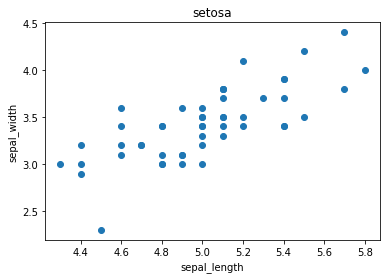

In [10]:
df_setosa = df[df['species']=='setosa']
x = list(df_setosa['sepal_length'])
y = list(df_setosa['sepal_width'])
plt.scatter(x, y);
plt.xlabel('sepal_length')
plt.ylabel('sepal_width')
plt.title('setosa')

sepcies가 setosa 인것으로 한정하여 위와 같은 표를 만드는 과정

---

첫줄의 dimension이 어떻게 되는가? 
shape(50, 5) ->column이 5개인 이유는 4개의 정보와 setosa임을 표시하는 column 하나

### Supervised learning: regression (linear regression)

함수가 뭐든 간에 숫자가 output으로 나오면 regression. y=ax+b 일차함수는 linear regression, 그 외에는 모두 non-linear regession

In [11]:
from sklearn.linear_model import LinearRegression

In [12]:
model = LinearRegression(fit_intercept=True)

fit_intercept=True
?????

In [13]:
import numpy as np
x = np.array(x)
y = np.array(y)

모든 machine learning은 array형태로 바꿔야 함. x, y는 위에서 입력한 setosa 값들

In [16]:
x

array([5.1, 4.9, 4.7, 4.6, 5. , 5.4, 4.6, 5. , 4.4, 4.9, 5.4, 4.8, 4.8,
       4.3, 5.8, 5.7, 5.4, 5.1, 5.7, 5.1, 5.4, 5.1, 4.6, 5.1, 4.8, 5. ,
       5. , 5.2, 5.2, 4.7, 4.8, 5.4, 5.2, 5.5, 4.9, 5. , 5.5, 4.9, 4.4,
       5.1, 5. , 4.5, 4.4, 5. , 5.1, 4.8, 5.1, 4.6, 5.3, 5. ])

In [15]:
x.shape

(50,)

현재 x는 1d array

In [18]:
#연습
x.reshape(25, 2)

array([[5.1, 4.9],
       [4.7, 4.6],
       [5. , 5.4],
       [4.6, 5. ],
       [4.4, 4.9],
       [5.4, 4.8],
       [4.8, 4.3],
       [5.8, 5.7],
       [5.4, 5.1],
       [5.7, 5.1],
       [5.4, 5.1],
       [4.6, 5.1],
       [4.8, 5. ],
       [5. , 5.2],
       [5.2, 4.7],
       [4.8, 5.4],
       [5.2, 5.5],
       [4.9, 5. ],
       [5.5, 4.9],
       [4.4, 5.1],
       [5. , 4.5],
       [4.4, 5. ],
       [5.1, 4.8],
       [5.1, 4.6],
       [5.3, 5. ]])

In [19]:
X = x.reshape(-1, 1)
X.shape

(50, 1)

2d array로 바꿔주는 과정!!
multiple regression을 가능하게 해주기 위해서.????? y=ax+b

---


(-1,1)은 (50,1)과 동일. -1은 다른 한 값을 기준으로 곱이 50이 되도록 자동으로 계산된 값을 입력해 줌. 

---


하나의 column에 50개의 자료들이 세로로 나열된 형태를 만들어주는 것


In [20]:
model.fit(X, y)

LinearRegression()

y=ax+b 틀 자체를 model이라고 함. 
fit: 그 직선 즉 a, b값을 구해내는 과정 

In [21]:
model.coef_

array([0.7985283])

coefficient(계수).
0.7985283이 기울기값

In [22]:
model.intercept_

-0.569432673039648

y절편값

In [23]:
xfit = np.linspace(4, 6)

np.linspace(4, 6, 50) 과 동일. 4에서 6까지 50개의 숫자로 만들어라. 여기서는 생략해도 동일. 

In [24]:
Xfit = xfit.reshape(-1, 1)
yfit = model.predict(Xfit)

Xfit은 2d array, yfit은 1d array임을 답할 수 있어야 함.

---


?????

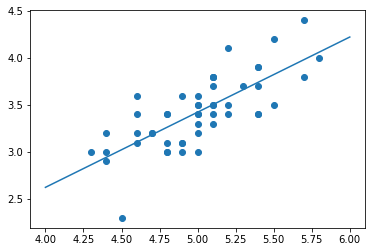

In [25]:
plt.scatter(x, y)
plt.plot(xfit, yfit);

linear regression을 통해 51번째 자료가 생겼을 때, sepal length의 값을 통해 sepal width의 값을 예측할 수 있음

---
괄호 안 마지막에 '.'을 넣으면 점선 표시 가능


In [26]:
df_setosa.corr()

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,0.742547,0.267176,0.278098
sepal_width,0.742547,1.000000,0.177700,0.232752
petal_length,0.267176,0.177700,1.000000,0.331630
petal_width,0.278098,0.232752,0.331630,1.000000


correlation 'r'값은 개별자료들이 직선에 밀집해 있을수록 크다

---
sepal과 petal은 서로 낮은 관련도를 보이는 것을 낮은 수치를 통해 알 수 있음. 


#### gradio implementation

In [29]:
!pip install gradio

In [30]:
import gradio as gr

def test (x):
  X = np.array(x).reshape(-1,1)
  y = model.predict(X)
  return y[0]

iface = gr.Interface(test, inputs = ["number"], outputs = ["text"])
iface.launch(debug=True)

Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
Running on public URL: https://13040.gradio.app

This share link expires in 72 hours. For free permanent hosting, check out Spaces (https://huggingface.co/spaces)


Keyboard interruption in main thread... closing server.


(<fastapi.applications.FastAPI at 0x7f682c2aa710>,
 'http://127.0.0.1:7860/',
 'https://13040.gradio.app')

debug=True: 오류 발생시 에러 메시지가 뜨도록 함. 오류 원인 알 수 있음. 

### Supervised learning: classification (Naive Bayes)

In [31]:
x = df.drop('species', axis=1) # axis = 0 (delete row) / 1 (delete column)
x.shape

(150, 4)

아까의 dataframe에서 species를 제거. column이 4개가 됨

In [32]:
y = df['species']
y.shape

(150,)

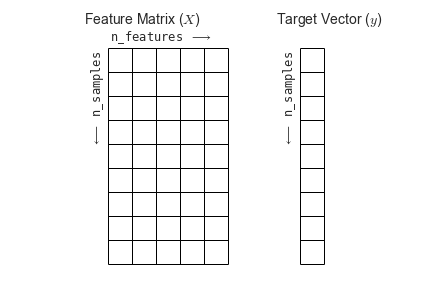

이 모양에서 x column이 왜 5개인지?????

In [33]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(x, y)

In [34]:
from sklearn.naive_bayes import GaussianNB # 1. choose model class
model = GaussianNB()                       # 2. instantiate model
model.fit(Xtrain, ytrain)                  # 3. fit model to data
yout = model.predict(Xtest)                # 4. predict on new data

In [35]:
from sklearn.metrics import accuracy_score
accuracy_score(ytest, yout)

0.9473684210526315

yout은 모델이 예측한 값, ytest는 원래의 값, 두 값을 비교하여 예측의 정확도를 평가하는 것 -> 0.94의 상당히 높은 정확도를 보임

#### gradio implementation

In [36]:
import pandas as pd
def test (in1, in2, in3, in4):
  data = {'sepal_length': [in1],
        'sepal_width': [in2],
        'petal_length': [in3],
        'petal_width': [in4]}
  Xtest = pd.DataFrame(data)
  yout = model.predict(Xtest)
  return yout

iface = gr.Interface(test, inputs = ["number", "number", "number", "number"], outputs = ["text"])
iface.launch()

Colab notebook detected. To show errors in colab notebook, set `debug=True` in `launch()`
Running on public URL: https://47491.gradio.app

This share link expires in 72 hours. For free permanent hosting, check out Spaces (https://huggingface.co/spaces)


(<fastapi.applications.FastAPI at 0x7f682c2aa710>,
 'http://127.0.0.1:7860/',
 'https://47491.gradio.app')

4개의 input을 입력하면 가장 적합한 iris종을 출력함

### Unsupervised learning: dimensionality (PCA) (Principal Component Analysis)
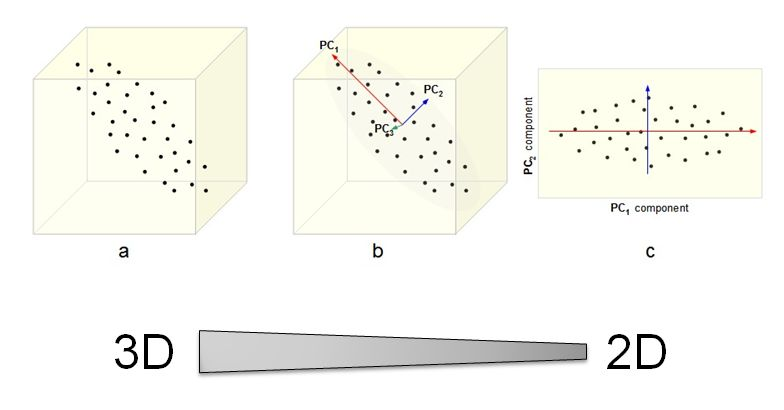

(3d vetor = 3d array)

---

축 간의 각도 90도는 서로 유지시킨채, 원점을 데이터의 한가운데로 이동시키고, 적절히 rotate시켜 축이 데이터들을 가장 잘 관통하도록 만든다.  

---

제일 긴 것을 PC1, 그 다음을 PC2, 그 다음을 PC2로 한다. pc3의 두께는 크지 않아 무시하는 것으로 함. 큰 두개의 값만 남긴다. (제일 큰 하나만 남기는 선택도 가능)

---
c. 2차원으로 차원을 축소하여 나타낼 수 있다. 


In [37]:
from sklearn.decomposition import PCA  # 1. Choose the model class
model = PCA(n_components=2)            # 2. Instantiate the model with hyperparameters
model.fit(x)                           # 3. Fit to data. Notice y is not specified!
X_2D = model.transform(x)  

상위 2개만 보도록 함. 
supervised에서는 fit에서 데이터를 x, y 모두 썼지만, 여기서는 model.fit(x)에서 데이터 하나만 사용함. 그치만 x가4차원


In [39]:
df['PCA1'] = X_2D[:, 0]
df['PCA2'] = X_2D[:, 1]
df

,sepal_length,sepal_width,petal_length,petal_width,species,PCA1,PCA2
0,5.1,3.5,1.4,0.2,setosa,-2.684126,0.319397
1,4.9,3.0,1.4,0.2,setosa,-2.714142,-0.177001
2,4.7,3.2,1.3,0.2,setosa,-2.888991,-0.144949
3,4.6,3.1,1.5,0.2,setosa,-2.745343,-0.318299
4,5.0,3.6,1.4,0.2,setosa,-2.728717,0.326755
...,...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica,1.944110,0.187532
146,6.3,2.5,5.0,1.9,virginica,1.527167,-0.375317
147,6.5,3.0,5.2,2.0,virginica,1.764346,0.078859
148,6.2,3.4,5.4,2.3,virginica,1.900942,0.116628


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


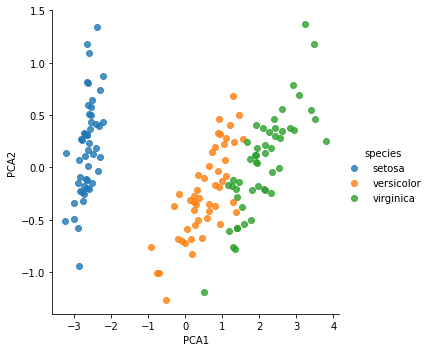

In [38]:

sns.lmplot("PCA1", "PCA2", hue='species', data=df, fit_reg=False);

4차원을 2차원으로 축소하여 plot으로 만들어냄. 

### Unsupervised learning: clustering 

---

(GMM) (Gaussion Mixture Model)
https://raw.githubusercontent.com/angeloyeo/angeloyeo.github.io/master/pics/2021-02-08-GMM_and_EM/pic1.mp4

In [ ]:
from sklearn.mixture import GaussianMixture as GMM   # 1. Choose the model class
model = GMM(n_components=3, covariance_type='full')  # 2. Instantiate the model with hyperparameters
model.fit(x)                                         # 3. Fit to data. Notice y is not specified!
y_gmm = model.predict(x)                             # 4. Determine cluster labels

In [ ]:
y_gmm

In [ ]:
df['cluster'] = y_gmm
sns.lmplot("PCA1", "PCA2", data=df, hue='species', col='cluster', fit_reg=False);